In [99]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import PIL
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [100]:
!rm -rf images
IMAGE_DIR = 'images'
!mkdir {IMAGE_DIR}

!wget -q -O ./images/daisy.zip https://github.com/PriyaVellanki/flower_classification/raw/main/data/daisy.zip
!wget -q -O ./images/dandelion.zip https://github.com/PriyaVellanki/flower_classification/raw/main/data/dandelion.zip

In [101]:
# !mkdir ./images/daisy
!unzip ./images/daisy.zip -d ./images/

!unzip ./images/dandelion.zip -d ./images/

Archive:  ./images/daisy.zip
   creating: ./images/daisy/
  inflating: ./images/__MACOSX/._daisy  
  inflating: ./images/daisy/14167534527_781ceb1b7a_n.jpg  
  inflating: ./images/__MACOSX/daisy/._14167534527_781ceb1b7a_n.jpg  
  inflating: ./images/daisy/34718882165_68cdc9def9_n.jpg  
  inflating: ./images/__MACOSX/daisy/._34718882165_68cdc9def9_n.jpg  
  inflating: ./images/daisy/5512287917_9f5d3f0f98_n.jpg  
  inflating: ./images/__MACOSX/daisy/._5512287917_9f5d3f0f98_n.jpg  
  inflating: ./images/daisy/476857510_d2b30175de_n.jpg  
  inflating: ./images/__MACOSX/daisy/._476857510_d2b30175de_n.jpg  
  inflating: ./images/daisy/33837577463_1ae52a3726_n.jpg  
  inflating: ./images/__MACOSX/daisy/._33837577463_1ae52a3726_n.jpg  
  inflating: ./images/daisy/34638378196_216d5bbc2e_n.jpg  
  inflating: ./images/__MACOSX/daisy/._34638378196_216d5bbc2e_n.jpg  
  inflating: ./images/daisy/8008258043_5457dd254b_n.jpg  
  inflating: ./images/__MACOSX/daisy/._8008258043_5457dd254b_n.jpg  
  infl

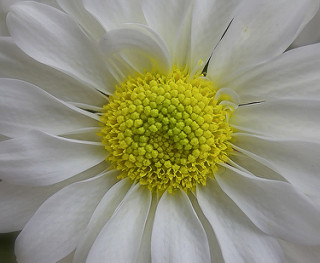

In [102]:
path = './images/daisy'
name = '100080576_f52e8ee070_n.jpg'
full_name = f'{path}/{name}'
load_img(full_name)

In [103]:
img = load_img(full_name, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

# **Pre-trained convolutional neural networks**

In [104]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [105]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [106]:
X = np.array([x])

In [107]:
X.shape

(1, 299, 299, 3)

In [108]:
X = preprocess_input(X)

In [109]:
pred = model.predict(X)

1/1 [==============================] - 1s 797ms/step


In [110]:
decode_predictions(pred)

[[('n11939491', 'daisy', 0.9296013),
  ('n02190166', 'fly', 0.0015900448),
  ('n02206856', 'bee', 0.0015062902),
  ('n02177972', 'weevil', 0.0005476807),
  ('n02165456', 'ladybug', 0.00047341417)]]

In [111]:
import os
import shutil
def cleanup():
  os.listdir('./images')
  shutil.rmtree('./images/.ipynb_checkpoints')

In [112]:
!rm -rf ./images/__MACOSX

# **Transfer Learning**

In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [114]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './images/',
    target_size=(150, 150),
    batch_size=32
)

Found 1308 images belonging to 2 classes.


In [115]:
train_ds.class_indices

{'daisy': 0, 'dandelion': 1}

In [116]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='./images/daisy'
FLOWER_DANDI_DIR='./images/dandelion'

In [117]:
# import glob
# daisy = glob.glob('./images/daisy/*.jpg')
# dandelion = glob.glob('./images/dandelion/*.jpg')



# data = []
# labels = []
# for i in daisy:
#   image=tf.keras.preprocessing.image.load_img(i,target_size= (150,150))
#   image=np.array(image)
#   data.append(image)
#   labels.append(0)
# for i in dandelion:
#   image=tf.keras.preprocessing.image.load_img(i, target_size= (150,150))
#   image=np.array(image)
#   data.append(image)
#   labels.append(1)

In [118]:
# data = np.array(data)
# labels = np.array(labels)


In [119]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
#                                                 random_state=42)

In [120]:
image_generator = ImageDataGenerator(validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [121]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [122]:
base_model=MobileNet(input_shape=(160, 160, 3),
                     weights='imagenet',
                     include_top=False


)
base_model.trainable = False
inputs = keras.Input(shape=(160, 160, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

In [123]:
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 mobilenet_1.00_160 (Functi  (None, 5, 5, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 dense_21 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 3230914 (12.32 MB)
Trainable params: 2050 (8.01 KB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [124]:
def mobilenet_model(learning_rate=0.01):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [125]:
scores = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    print(learning_rate)

    model = mobilenet_model(learning_rate=learning_rate)
    history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)
    scores[learning_rate] = history.history

    print()
    print()

0.0001
Epoch 1/20
33/33 [==============================] - 5s 88ms/step - loss: 0.7234 - accuracy: 0.5654 - val_loss: 0.7140 - val_accuracy: 0.6092
Epoch 2/20
33/33 [==============================] - 2s 71ms/step - loss: 0.6840 - accuracy: 0.5941 - val_loss: 0.6911 - val_accuracy: 0.5824
Epoch 3/20
33/33 [==============================] - 2s 71ms/step - loss: 0.6621 - accuracy: 0.6122 - val_loss: 0.6752 - val_accuracy: 0.5939
Epoch 4/20
33/33 [==============================] - 2s 70ms/step - loss: 0.6466 - accuracy: 0.6189 - val_loss: 0.6622 - val_accuracy: 0.5977
Epoch 5/20
33/33 [==============================] - 2s 71ms/step - loss: 0.6309 - accuracy: 0.6304 - val_loss: 0.6506 - val_accuracy: 0.6322
Epoch 6/20
33/33 [==============================] - 3s 99ms/step - loss: 0.6166 - accuracy: 0.6523 - val_loss: 0.6413 - val_accuracy: 0.6169
Epoch 7/20
33/33 [==============================] - 2s 74ms/step - loss: 0.6058 - accuracy: 0.6590 - val_loss: 0.6323 - val_accuracy: 0.6284
Epoch 

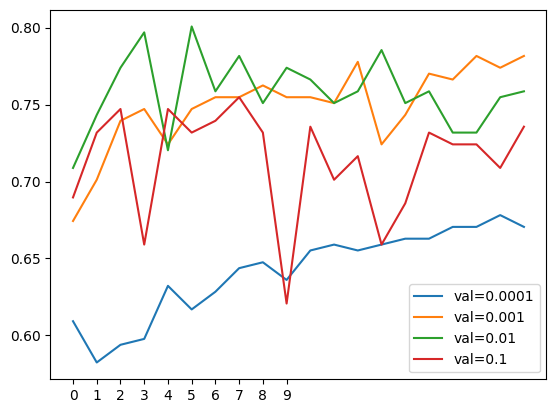

In [126]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [127]:
# del scores[0.0001]
del scores[0.1]

In [128]:
learning_rate = 0.01


# **Adding More Layers**

In [129]:
def mobilenet_model(learning_rate=0.01,size=1024):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size,activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [130]:
learning_rate = 0.01

scores = {}

size = 256
# Create checkpoint to save best model for version 3
filepath = './mobilenet_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')
model = mobilenet_model(learning_rate=learning_rate, size=256)
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset,callbacks=[checkpoint])
scores[size] = history.history

Epoch 1/10
33/33 [==============================] - 7s 122ms/step - loss: 1.7576 - accuracy: 0.5635 - val_loss: 0.5867 - val_accuracy: 0.7088
Epoch 2/10
33/33 [==============================] - 3s 87ms/step - loss: 0.5259 - accuracy: 0.7469 - val_loss: 0.5474 - val_accuracy: 0.7126
Epoch 3/10
33/33 [==============================] - 3s 75ms/step - loss: 0.4549 - accuracy: 0.7870 - val_loss: 0.4943 - val_accuracy: 0.7739
Epoch 4/10
33/33 [==============================] - 2s 72ms/step - loss: 0.3752 - accuracy: 0.8319 - val_loss: 0.5233 - val_accuracy: 0.7663
Epoch 5/10
33/33 [==============================] - 4s 110ms/step - loss: 0.3373 - accuracy: 0.8625 - val_loss: 0.5569 - val_accuracy: 0.7203
Epoch 6/10
33/33 [==============================] - 3s 79ms/step - loss: 0.3154 - accuracy: 0.8663 - val_loss: 0.5610 - val_accuracy: 0.7893
Epoch 7/10
33/33 [==============================] - 2s 73ms/step - loss: 0.2658 - accuracy: 0.8863 - val_loss: 0.5722 - val_accuracy: 0.7510
Epoch 8/10


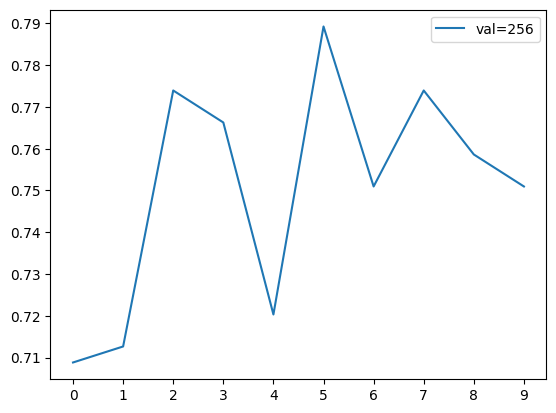

In [131]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % size))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

In [132]:
size = 256


# **Regularization and drop out**

In [133]:
def mobilenet_model(learning_rate=0.01,size=1024,drop_rate=0.2):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size,activation='relu')(vectors)
    dropout = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(2)(dropout)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [134]:
learning_rate = 0.01
size = 256

# hashmap to store results
scores = {}

# various drop rate list
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)

    model = mobilenet_model(learning_rate=learning_rate,size=size,drop_rate=droprate)


    history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
33/33 [==============================] - 5s 86ms/step - loss: 1.1210 - accuracy: 0.6667 - val_loss: 0.5946 - val_accuracy: 0.6935
Epoch 2/30
33/33 [==============================] - 3s 77ms/step - loss: 0.4478 - accuracy: 0.7899 - val_loss: 0.5665 - val_accuracy: 0.7050
Epoch 3/30
33/33 [==============================] - 2s 71ms/step - loss: 0.3762 - accuracy: 0.8300 - val_loss: 0.5256 - val_accuracy: 0.7854
Epoch 4/30
33/33 [==============================] - 2s 71ms/step - loss: 0.3648 - accuracy: 0.8462 - val_loss: 0.5474 - val_accuracy: 0.7663
Epoch 5/30
33/33 [==============================] - 2s 72ms/step - loss: 0.3151 - accuracy: 0.8520 - val_loss: 0.5625 - val_accuracy: 0.7548
Epoch 6/30
33/33 [==============================] - 3s 100ms/step - loss: 0.2808 - accuracy: 0.8873 - val_loss: 0.5954 - val_accuracy: 0.7663
Epoch 7/30
33/33 [==============================] - 3s 80ms/step - loss: 0.2412 - accuracy: 0.8978 - val_loss: 0.7615 - val_accuracy: 0.7126
Epoch 8/

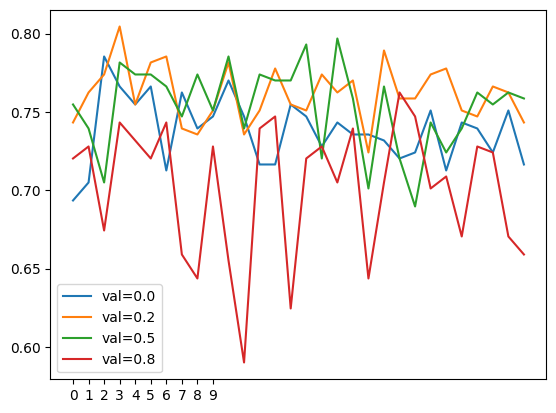

In [135]:
for dr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % dr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % dr))

plt.xticks(np.arange(10))
plt.legend()

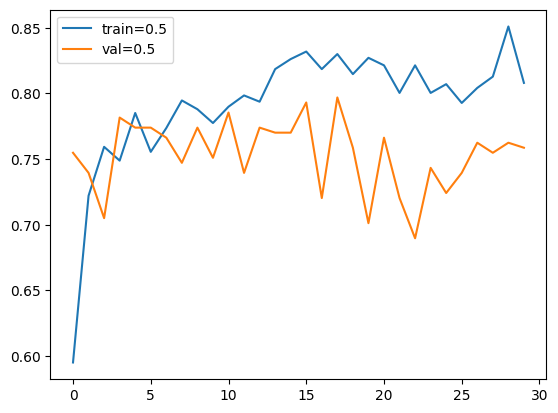

In [136]:
for dr, hist in scores.items():
    if dr == 0.5:
      plt.plot(hist['accuracy'], label=('train=%s' % dr))
      plt.plot(hist['val_accuracy'], label=('val=%s' % dr))

      # plt.xticks(np.arange(10))
      plt.legend()

In [137]:
learning_rate = 0.01
size = 256

# hashmap to store results
scores = {}

filepath = './mobilent_v2_{epoch:02d}_{val_accuracy:.3f}.h5'


checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

model = mobilenet_model(learning_rate=learning_rate, size=256,drop_rate=0.2)
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset,callbacks=[checkpoint])
scores[size] = history.history





Epoch 1/10
33/33 [==============================] - 5s 93ms/step - loss: 2.3738 - accuracy: 0.5721 - val_loss: 0.5935 - val_accuracy: 0.6820
Epoch 2/10
33/33 [==============================] - 3s 76ms/step - loss: 0.5314 - accuracy: 0.7373 - val_loss: 0.5497 - val_accuracy: 0.7318
Epoch 3/10
33/33 [==============================] - 3s 77ms/step - loss: 0.4744 - accuracy: 0.7956 - val_loss: 0.5112 - val_accuracy: 0.7548
Epoch 4/10
33/33 [==============================] - 4s 107ms/step - loss: 0.4247 - accuracy: 0.7956 - val_loss: 0.5435 - val_accuracy: 0.7739
Epoch 5/10
33/33 [==============================] - 3s 76ms/step - loss: 0.3940 - accuracy: 0.8281 - val_loss: 0.5094 - val_accuracy: 0.7969
Epoch 6/10
33/33 [==============================] - 2s 72ms/step - loss: 0.3682 - accuracy: 0.8309 - val_loss: 0.5249 - val_accuracy: 0.7739
Epoch 7/10
33/33 [==============================] - 3s 76ms/step - loss: 0.3627 - accuracy: 0.8405 - val_loss: 0.5178 - val_accuracy: 0.8046
Epoch 8/10
3

Data Augmentation

In [138]:
train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      # horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [139]:

# Create checkpoint to save best model for version 3
filepath = './mobilenet_v2_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 256
drop_rate = 0.5


model = mobilenet_model(learning_rate=learning_rate,
                       size=size,
                       drop_rate=drop_rate
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
33/33 [==============================] - 12s 294ms/step - loss: 2.5960 - accuracy: 0.5482 - val_loss: 0.6096 - val_accuracy: 0.6935
Epoch 2/30
33/33 [==============================] - 9s 281ms/step - loss: 0.6074 - accuracy: 0.6839 - val_loss: 0.5789 - val_accuracy: 0.7165
Epoch 3/30
33/33 [==============================] - 8s 234ms/step - loss: 0.5687 - accuracy: 0.7202 - val_loss: 0.5562 - val_accuracy: 0.7395
Epoch 4/30
33/33 [==============================] - 9s 282ms/step - loss: 0.5371 - accuracy: 0.7211 - val_loss: 0.5770 - val_accuracy: 0.6743
Epoch 5/30
33/33 [==============================] - 9s 285ms/step - loss: 0.5347 - accuracy: 0.7345 - val_loss: 0.5332 - val_accuracy: 0.7586
Epoch 6/30
33/33 [==============================] - 8s 238ms/step - loss: 0.5152 - accuracy: 0.7364 - val_loss: 0.5186 - val_accuracy: 0.7510
Epoch 7/30
33/33 [==============================] - 10s 289ms/step - loss: 0.4786 - accuracy: 0.7421 - val_loss: 0.5005 - val_accuracy: 0.7931
Epoc

# **TransferLearning with Xception**

In [140]:
image_generator = ImageDataGenerator(validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [141]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 3s 0us/step


In [142]:
model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_66 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_40 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 20865578 (79.60 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [143]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [144]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
33/33 [==============================] - 11s 203ms/step - loss: 10.9815 - accuracy: 0.6266 - val_loss: 6.0437 - val_accuracy: 0.6628
Epoch 2/10
33/33 [==============================] - 3s 84ms/step - loss: 5.4832 - accuracy: 0.6762 - val_loss: 9.5323 - val_accuracy: 0.6782
Epoch 3/10
33/33 [==============================] - 3s 88ms/step - loss: 8.8867 - accuracy: 0.6896 - val_loss: 6.2937 - val_accuracy: 0.7011
Epoch 4/10
33/33 [==============================] - 3s 85ms/step - loss: 3.4237 - accuracy: 0.7966 - val_loss: 4.4426 - val_accuracy: 0.7126
Epoch 5/10
33/33 [==============================] - 3s 85ms/step - loss: 3.6585 - accuracy: 0.7631 - val_loss: 4.7943 - val_accuracy: 0.7395
Epoch 6/10
33/33 [==============================] - 3s 86ms/step - loss: 1.6972 - accuracy: 0.8395 - val_loss: 3.4127 - val_accuracy: 0.7586
Epoch 7/10
33/33 [==============================] - 4s 118ms/step - loss: 1.0851 - accuracy: 0.8615 - val_loss: 3.3816 - val_accuracy: 0.7548
Epoch 8/1

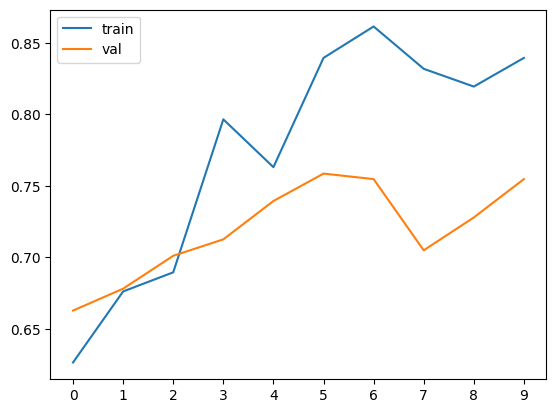

In [145]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# **Adjust Learning Rate**

In [146]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [147]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
33/33 [==============================] - 7s 113ms/step - loss: 4.6697 - accuracy: 0.4585 - val_loss: 2.6510 - val_accuracy: 0.4636
Epoch 2/10
33/33 [==============================] - 3s 85ms/step - loss: 2.9542 - accuracy: 0.5138 - val_loss: 2.0365 - val_accuracy: 0.5326
Epoch 3/10
33/33 [==============================] - 4s 106ms/step - loss: 2.2726 - accuracy: 0.5521 - val_loss: 1.8188 - val_accuracy: 0.5900
Epoch 4/10
33/33 [==============================] - 3s 82ms/step - loss: 1.8626 - accuracy: 0.5836 - val_loss: 1.6113 - val_accuracy: 0.5824
Epoch 5/10
33/33 [==============================] - 3s 83ms/step - loss: 1.6277 - accuracy: 0.6074 - val_loss: 1.5247 - val_accuracy: 0.5939
Epoch 6/10
33/33 [==============================] - 3s 85ms/step - loss: 1.4508 - accuracy: 0.6237 - val_loss: 1.4380 - val_accuracy: 0.5939
Epoch 7/10
33/33 [==============================] - 3s 101ms/step - loss: 1.3344 - accuracy: 0.6390 - val_loss: 1.3961 - val_accuracy: 0.5939
Epo

In [148]:
learning_rate = 0.001
del scores[0.1]


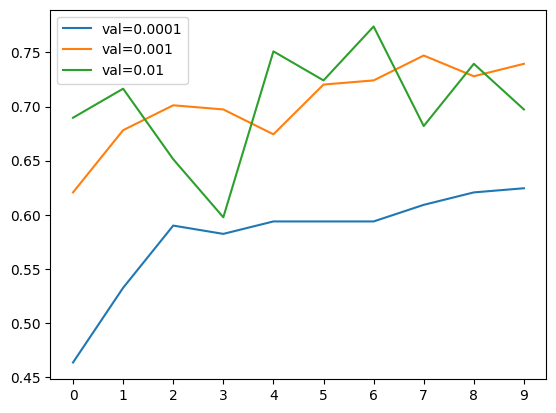

In [149]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

# **Additional Layers**

In [150]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [151]:
learning_rate = 0.01

scores = {}

# List of inner layer sizes
sizes = [40,50,100,1000]

for size in sizes:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
    scores[size] = history.history

    print()


40
Epoch 1/10
33/33 [==============================] - 8s 127ms/step - loss: 13.7696 - accuracy: 0.4661 - val_loss: 0.6929 - val_accuracy: 0.4330
Epoch 2/10
33/33 [==============================] - 3s 84ms/step - loss: 0.6911 - accuracy: 0.5368 - val_loss: 0.6877 - val_accuracy: 0.5670
Epoch 3/10
33/33 [==============================] - 3s 86ms/step - loss: 0.6856 - accuracy: 0.5664 - val_loss: 0.6846 - val_accuracy: 0.5670
Epoch 4/10
33/33 [==============================] - 3s 84ms/step - loss: 0.6848 - accuracy: 0.5664 - val_loss: 0.6842 - val_accuracy: 0.5670
Epoch 5/10
33/33 [==============================] - 3s 103ms/step - loss: 0.6846 - accuracy: 0.5664 - val_loss: 0.6842 - val_accuracy: 0.5670
Epoch 6/10
33/33 [==============================] - 3s 82ms/step - loss: 0.6845 - accuracy: 0.5664 - val_loss: 0.6841 - val_accuracy: 0.5670
Epoch 7/10
33/33 [==============================] - 3s 83ms/step - loss: 0.6844 - accuracy: 0.5664 - val_loss: 0.6841 - val_accuracy: 0.5670
Epoch 8

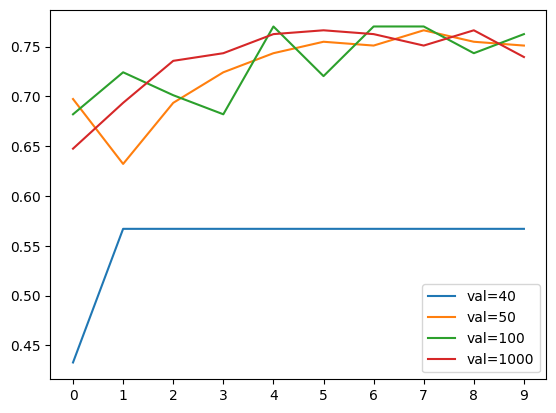

In [152]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % size))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

# **Regularization**

In [153]:
def make_model(learning_rate=0.01,size_inner=100,drop_rate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(2)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [154]:
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)

    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       drop_rate=droprate)

    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
33/33 [==============================] - 6s 110ms/step - loss: 11.2906 - accuracy: 0.6332 - val_loss: 0.8003 - val_accuracy: 0.6935
Epoch 2/30
33/33 [==============================] - 4s 116ms/step - loss: 0.5469 - accuracy: 0.7536 - val_loss: 0.5671 - val_accuracy: 0.7088
Epoch 3/30
33/33 [==============================] - 3s 83ms/step - loss: 0.4593 - accuracy: 0.7937 - val_loss: 0.5502 - val_accuracy: 0.7586
Epoch 4/30
33/33 [==============================] - 3s 83ms/step - loss: 0.4876 - accuracy: 0.7870 - val_loss: 0.6274 - val_accuracy: 0.6743
Epoch 5/30
33/33 [==============================] - 3s 84ms/step - loss: 0.4281 - accuracy: 0.8157 - val_loss: 0.5886 - val_accuracy: 0.7280
Epoch 6/30
33/33 [==============================] - 4s 117ms/step - loss: 0.3746 - accuracy: 0.8415 - val_loss: 0.6123 - val_accuracy: 0.7318
Epoch 7/30
33/33 [==============================] - 3s 80ms/step - loss: 0.3391 - accuracy: 0.8520 - val_loss: 0.6907 - val_accuracy: 0.6858
Epoch

# **Augmentation**

In [155]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      # horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [156]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [157]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)


Epoch 1/30
33/33 [==============================] - 14s 277ms/step - loss: 17.2711 - accuracy: 0.5702 - val_loss: 1.2710 - val_accuracy: 0.6743
Epoch 2/30
33/33 [==============================] - 8s 239ms/step - loss: 0.8214 - accuracy: 0.7049 - val_loss: 0.5934 - val_accuracy: 0.7050
Epoch 3/30
33/33 [==============================] - 9s 278ms/step - loss: 0.5372 - accuracy: 0.7545 - val_loss: 0.5910 - val_accuracy: 0.7280
Epoch 4/30
33/33 [==============================] - 9s 264ms/step - loss: 0.4904 - accuracy: 0.7841 - val_loss: 0.5273 - val_accuracy: 0.7663
Epoch 5/30
33/33 [==============================] - 8s 240ms/step - loss: 0.4655 - accuracy: 0.7908 - val_loss: 0.5252 - val_accuracy: 0.7778
Epoch 6/30
33/33 [==============================] - 9s 278ms/step - loss: 0.4847 - accuracy: 0.7861 - val_loss: 0.5375 - val_accuracy: 0.7739
Epoch 7/30
33/33 [==============================] - 9s 281ms/step - loss: 0.4357 - accuracy: 0.8243 - val_loss: 0.5463 - val_accuracy: 0.7854
Epoc

**Augmentation with different inputs**

In [158]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      # horizontal_flip=True,
                                      shear_range=5.0,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [159]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
33/33 [==============================] - 13s 308ms/step - loss: 7.4756 - accuracy: 0.5683 - val_loss: 0.6919 - val_accuracy: 0.4330
Epoch 2/30
33/33 [==============================] - 9s 280ms/step - loss: 0.7570 - accuracy: 0.6447 - val_loss: 0.6053 - val_accuracy: 0.6475
Epoch 3/30
33/33 [==============================] - 8s 244ms/step - loss: 0.5715 - accuracy: 0.7068 - val_loss: 0.6002 - val_accuracy: 0.7165
Epoch 4/30
33/33 [==============================] - 9s 285ms/step - loss: 0.5317 - accuracy: 0.7268 - val_loss: 0.5433 - val_accuracy: 0.7241
Epoch 5/30
33/33 [==============================] - 10s 292ms/step - loss: 0.5091 - accuracy: 0.7507 - val_loss: 0.5545 - val_accuracy: 0.7011
Epoch 6/30
33/33 [==============================] - 8s 243ms/step - loss: 0.5170 - accuracy: 0.7469 - val_loss: 0.5611 - val_accuracy: 0.6858
Epoch 7/30
33/33 [==============================] - 9s 286ms/step - loss: 0.5194 - accuracy: 0.7526 - val_loss: 0.5278 - val_accuracy: 0.7510
Epoc

# **Saving the best model **

In [160]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [161]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=[checkpoint])

Epoch 1/30
33/33 [==============================] - 13s 312ms/step - loss: 15.8706 - accuracy: 0.5587 - val_loss: 0.7077 - val_accuracy: 0.5670
Epoch 2/30
33/33 [==============================] - 8s 255ms/step - loss: 0.6644 - accuracy: 0.5387 - val_loss: 0.6404 - val_accuracy: 0.5824
Epoch 3/30
33/33 [==============================] - 8s 251ms/step - loss: 0.6060 - accuracy: 0.6304 - val_loss: 0.6295 - val_accuracy: 0.6897
Epoch 4/30
33/33 [==============================] - 9s 279ms/step - loss: 0.5909 - accuracy: 0.7173 - val_loss: 0.6174 - val_accuracy: 0.6858
Epoch 5/30
33/33 [==============================] - 9s 287ms/step - loss: 0.5657 - accuracy: 0.7316 - val_loss: 0.5907 - val_accuracy: 0.7318
Epoch 6/30
33/33 [==============================] - 8s 239ms/step - loss: 0.5453 - accuracy: 0.7545 - val_loss: 0.5898 - val_accuracy: 0.7050
Epoch 7/30
33/33 [==============================] - 10s 292ms/step - loss: 0.5380 - accuracy: 0.7402 - val_loss: 0.6721 - val_accuracy: 0.7356
Epo

# **Train Larger Model**

In [162]:
train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(299, 299),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [163]:

# Create checkpoint to save best model for version 3
filepath = './xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=[checkpoint])

Epoch 1/30
33/33 [==============================] - 38s 901ms/step - loss: 21.3408 - accuracy: 0.6294 - val_loss: 2.0626 - val_accuracy: 0.6284
Epoch 2/30
33/33 [==============================] - 27s 831ms/step - loss: 2.8594 - accuracy: 0.6934 - val_loss: 3.2970 - val_accuracy: 0.6092
Epoch 3/30
33/33 [==============================] - 27s 831ms/step - loss: 1.5190 - accuracy: 0.7459 - val_loss: 2.1695 - val_accuracy: 0.6897
Epoch 4/30
33/33 [==============================] - 28s 835ms/step - loss: 0.9763 - accuracy: 0.7698 - val_loss: 1.0598 - val_accuracy: 0.6973
Epoch 5/30
33/33 [==============================] - 27s 804ms/step - loss: 1.0860 - accuracy: 0.7526 - val_loss: 2.2441 - val_accuracy: 0.6667
Epoch 6/30
33/33 [==============================] - 27s 824ms/step - loss: 1.0101 - accuracy: 0.7564 - val_loss: 1.7790 - val_accuracy: 0.7088
Epoch 7/30
33/33 [==============================] - 27s 811ms/step - loss: 1.0350 - accuracy: 0.7813 - val_loss: 1.4622 - val_accuracy: 0.666

Transfer Learning with different architecture- **MobilNet**